In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv("data.csv")
print(df)

             Date Time (utc)                                Region  Magnitude  \
0      23/06/2024   04:51:49                  Mindanao, Philippine        4.8   
1      23/06/2024   03:58:03               Near Coast of Venezuela        5.9   
2      23/06/2024   03:12:08      Near East Coast of Honshu, japan        5.0   
3      22/06/2024   20:46:51                    Near Coast of Peru        5.3   
4      22/06/2024   18:08:44  Afghanistan-Tajikistan Border Region        3.8   
...           ...        ...                                   ...        ...   
14721  27/11/2015   16:40:28                Near Sirinagar Kashmir        4.8   
14722  26/11/2015   16:18:00                         Dadu Pakistan        3.0   
14723  22/11/2015   18:16:04         Afghanistan-Tajikistan Border        6.2   
14724  19/11/2015   23:38:47                 50 km East of Bhakkar        3.8   
14725  12/04/2015   03:36:12                        Near Abbatabad        2.3   

       Depth (km) Latitude 

In [14]:
print(df.describe()) # summary statistics for numerical columns

          Magnitude    Depth (km)
count  14726.000000  14726.000000
mean       4.465259     94.491783
std        1.048695    116.171875
min        0.700000      0.000000
25%        3.700000     11.000000
50%        4.600000     60.000000
75%        5.200000    134.000000
max       37.000000   3654.000000


In [15]:
print(df.isnull().sum()) # number of missing values in each column

Date            0
Time (utc)      0
Region          0
Magnitude       0
Depth (km)      0
Latitude        0
Longitude       0
Mode            0
Map           128
dtype: int64


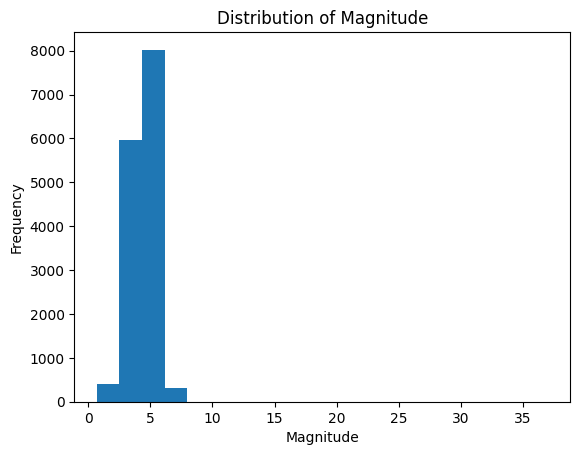

In [16]:
# distribution of magnitude
plt.hist(df['Magnitude'], bins=20)
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.title('Distribution of Magnitude')
plt.show()

In [17]:
# Average Depth by Region
avg_depth_by_region = df.groupby('Region')['Depth (km)'].mean()
print(avg_depth_by_region)

Region
04 Km Southwest of Rawat, Rawalpindi                  18.0
04km SW of Kaghan, KP                                 33.0
05 Km Northwest of Gujrat, Punjab. (revised)           6.0
05 Km Southeast  of Mastung, Baluchistan (Revised)    30.0
05 km NW of Chitral, KP                               30.0
                                                      ... 
sunda Strait, Indonesia                               59.0
vanuatu islands                                       10.0
western Indian Antarctic Ridge                        10.0
western Iran                                          10.0
xizang.                                               10.0
Name: Depth (km), Length: 3221, dtype: float64


In [18]:
# Number of Events by Region
events_by_region = df['Region'].value_counts()
print(events_by_region)

Region
Hindu Kush Region, Afghanistan          1592
Afghanistan-Tajikistan Border Region    1214
Hindu Kush Region,Afghanistan            662
Tajikistan                               464
Southeastern Afghanistan                 230
                                        ... 
29 Km East of Harnai, Balchistan           1
Sout of Africa                             1
Hindu Kush Region, in Pakistan             1
4 Km NE of Bagh, AJK                       1
Pakistan, 40 km NW of Layyah City          1
Name: count, Length: 3221, dtype: int64


In [19]:
# Convert Date and Time columns to datetime
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time (utc)'])
df.set_index('Datetime', inplace=True)

C:\Users\hoafi\AppData\Local\Temp\ipykernel_28412\1357075259.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time (utc)'])


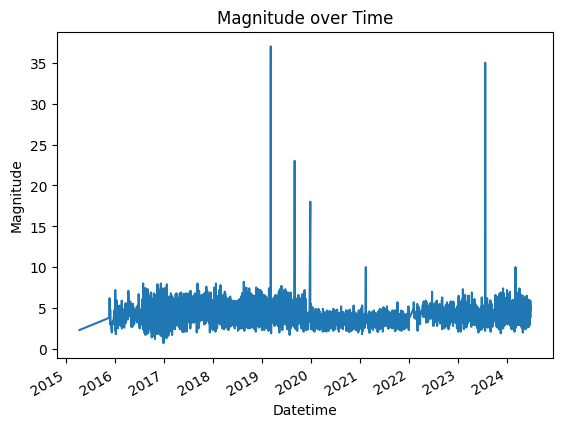

In [20]:
# Plot Magnitude over time
df['Magnitude'].plot()
plt.xlabel('Datetime')
plt.ylabel('Magnitude')
plt.title('Magnitude over Time')
plt.show()

In [21]:
# Correlation analysis
correlation_matrix = df.corr()
print(correlation_matrix)

ValueError: could not convert string to float: '23/06/2024'